In [105]:
import pandas as pd
import matplotlib.pyplot as plt

In [114]:
df = pd.read_csv('lod01.csv', sep = ';')
df.head()

,CustomerID,OrderID
0,2211,88028
1,68,37537
2,1155,90853
3,68,37537
4,1155,90853


In [107]:
Orders_per_Customer = df.groupby(['CustomerID'])['OrderID'].nunique().reset_index()
Orders_per_Customer.columns = ['CustomerID', 'Total_Orders']
Orders_per_Customer.head()

,CustomerID,Total_Orders
0,2,1
1,3,4
2,5,2
3,6,2
4,7,1


In [108]:
Freq = Orders_per_Customer.groupby(['Total_Orders'])['CustomerID'].nunique().reset_index()
Freq.columns = ['Total_Orders', 'Frequency']
Freq.head()

,Total_Orders,Frequency
0,1,1027
1,2,479
2,3,439
3,4,366
4,5,224


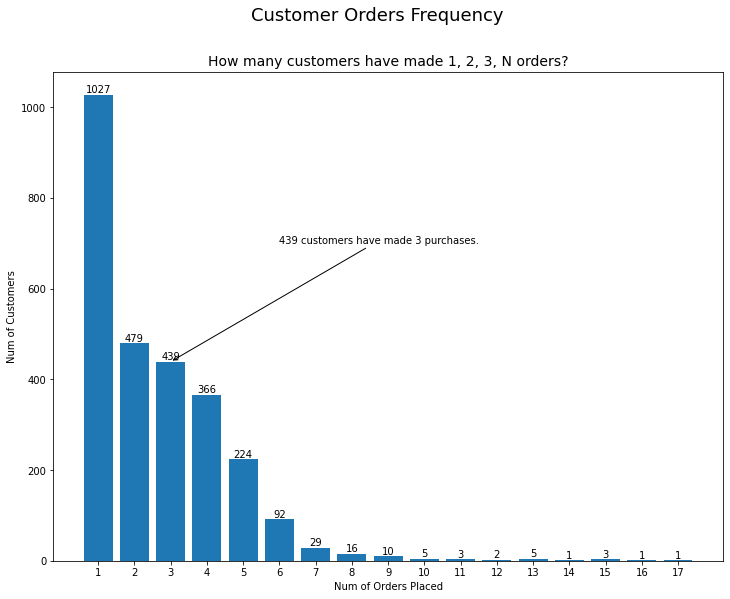

In [113]:
fig, ax = plt.subplots()

fig.set_size_inches(12, 9)

ax.bar(Freq.Total_Orders, Freq.Frequency)

ax.bar_label(ax.containers[0], label_type = 'edge')

ax.set_xlabel('Num of Orders Placed')
ax.set_ylabel('Num of Customers')

plt.suptitle('Customer Orders Frequency', fontsize = 18)
plt.title('How many customers have made 1, 2, 3, N orders?', fontsize = 14)

plt.xticks(Freq.Total_Orders)

plt.annotate(str(Freq.Frequency[2]) + ' customers have made ' + str(Freq.Total_Orders[2]) + ' purchases.', 
             xy = (Freq.Total_Orders[2], Freq.Frequency[2]),
             xytext = (6, 700),
             arrowprops = dict(arrowstyle = "->"))

plt.show()